# Morphological Image Processing

Bu bölümde, ilk önce ikili görüntülerde ve ardından gri tonlamalı görüntülerde birkaç morfolojik işlem gerçekleştirmek için, scikit-image'ın morfoloji modülündeki işlevlerin nasıl kullanılacağını göstereceğiz.

## İkili işlemler (Binary operations)

İkili görüntülerde morfolojik işlemlerle başlayalım. İşlevleri çağırmadan önce ikili giriş görüntüsü (örneğin, sabit eşikli basit eşikli) oluşturmamız gerekir.
Erozyon

**Erozyon**, ön plandaki nesnelerin boyutunu küçülten, nesne sınırlarını düzelten ve yarımadaları, parmakları ve küçük nesneleri kaldıran temel bir morfolojik işlemdir. Aşağıdaki kod bloğu, ikili bir görüntünün hızlı ikili morfolojik aşınmasını hesaplayan `binary_erosion ()` işlevinin nasıl kullanılacağını gösterir:

In [12]:
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion, binary_dilation, rectangle, binary_opening, binary_closing, disk
import numpy as np

def plot_image(image, title=''):
    plt.title(title, size=20), plt.imshow(image)
    plt.axis('off') # comment this line if you want axis ticks

def plot_images_horizontally(original, filtered, filter_name, sz=(18,7)):
    plt.gray()
    plt.figure(figsize = sz)
    plt.subplot(1,2,1), plot_image(original, 'original')
    plt.subplot(1,2,2), plot_image(filtered, filter_name)
    plt.show() 

<Figure size 432x288 with 0 Axes>

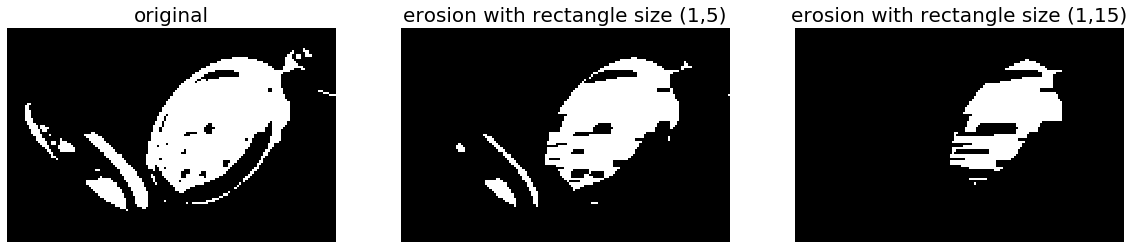

In [13]:
im = rgb2gray(imread('images/clock.png'))
im[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
im[im > 0.5] = 1

plt.gray()
plt.figure(figsize=(20,10))
plt.subplot(1,3,1), plot_image(im, 'original')

im1 = binary_erosion(im, rectangle(1,5))
plt.subplot(1,3,2), plot_image(im1, 'erosion with rectangle size (1,5)')

im1 = binary_erosion(im, rectangle(1,15))
plt.subplot(1,3,3), plot_image(im1, 'erosion with rectangle size (1,15)')
plt.show()

<Figure size 432x288 with 0 Axes>

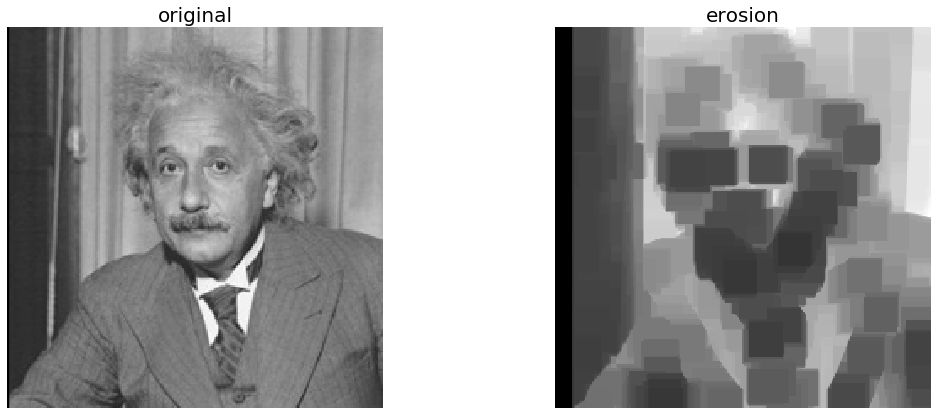

In [14]:
from skimage.morphology import square
from skimage.morphology import dilation, erosion, closing, opening, square
img = imread('images/einstein.jpg')
img = rgb2gray(img)
# kare filtre
struct_elem = square(20)
eroded = erosion(img, struct_elem)
plot_images_horizontally(img, eroded, 'erosion')

**Dilatasyon**, *erozyonun* büzüldüğü ön plan nesnelerini genişletir. Genişleme, aynı zamanda sınırları düzgünleştirir, ikili görüntülerde boşlukları ve boşlukları kapatır.

<Figure size 432x288 with 0 Axes>

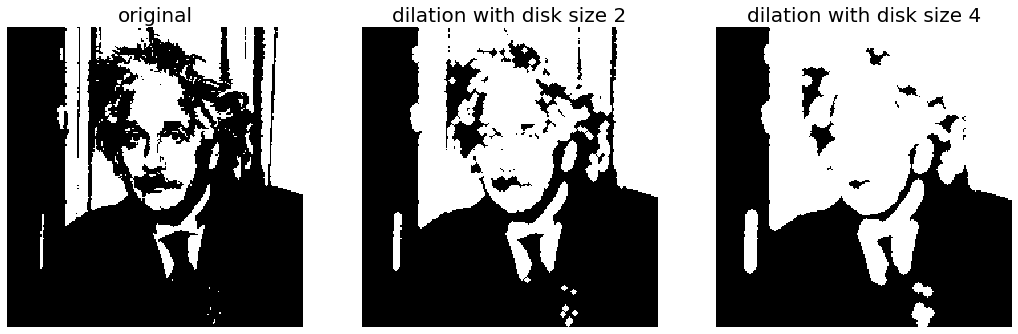

In [15]:
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float
img = rgb2gray(img_as_float(imread('images/einstein.jpg')))
img[img <= 0.5] = 0
img[img > 0.5] = 1
plt.gray()
plt.figure(figsize=(18,9))
plt.subplot(131)
plt.imshow(img)
plt.title('original', size=20)
plt.axis('off')
for d in range(1,3):
    plt.subplot(1,3,d+1)
    im1 = binary_dilation(img, disk(2*d))
    plt.imshow(im1)
    plt.title('dilation with disk size ' + str(2*d), size=20)
    plt.axis('off')
plt.show() 

<Figure size 432x288 with 0 Axes>

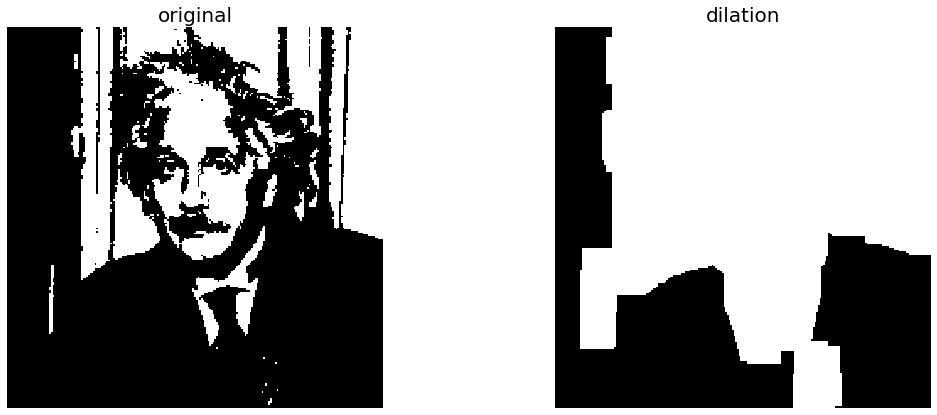

In [16]:
dilated = dilation(img, struct_elem)
plot_images_horizontally(img, dilated, 'dilation')

**Açınım (opening)** küçük nesnelerin çıkarılması, **kapanım (closing)** ise deliklerin çıkarılmasıdır.

<Figure size 432x288 with 0 Axes>

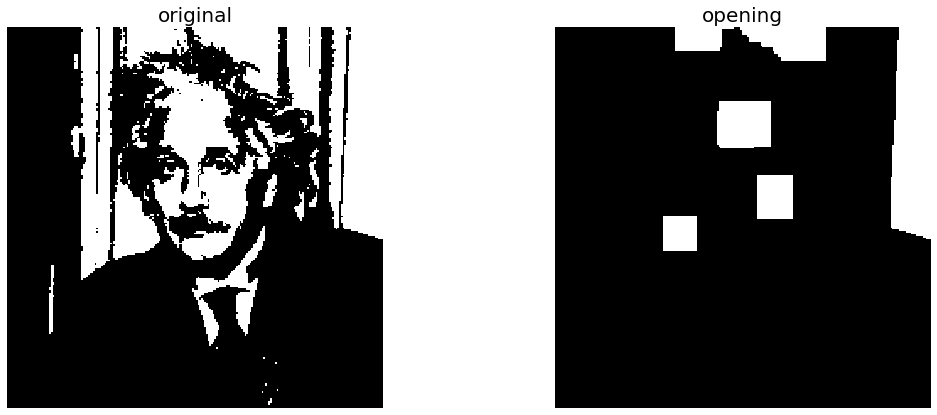

In [17]:
opened = opening(img, struct_elem)
plot_images_horizontally(img, opened, 'opening')

<Figure size 432x288 with 0 Axes>

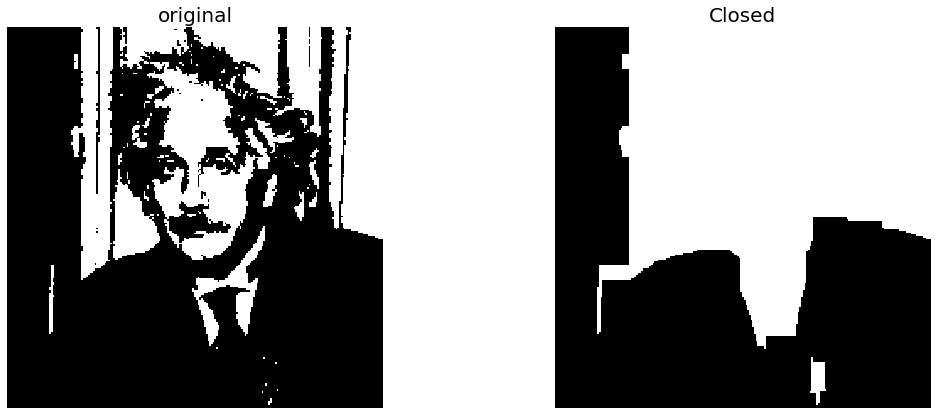

In [18]:
closed = closing(img, struct_elem)
plot_images_horizontally(img, closed, 'Closed')

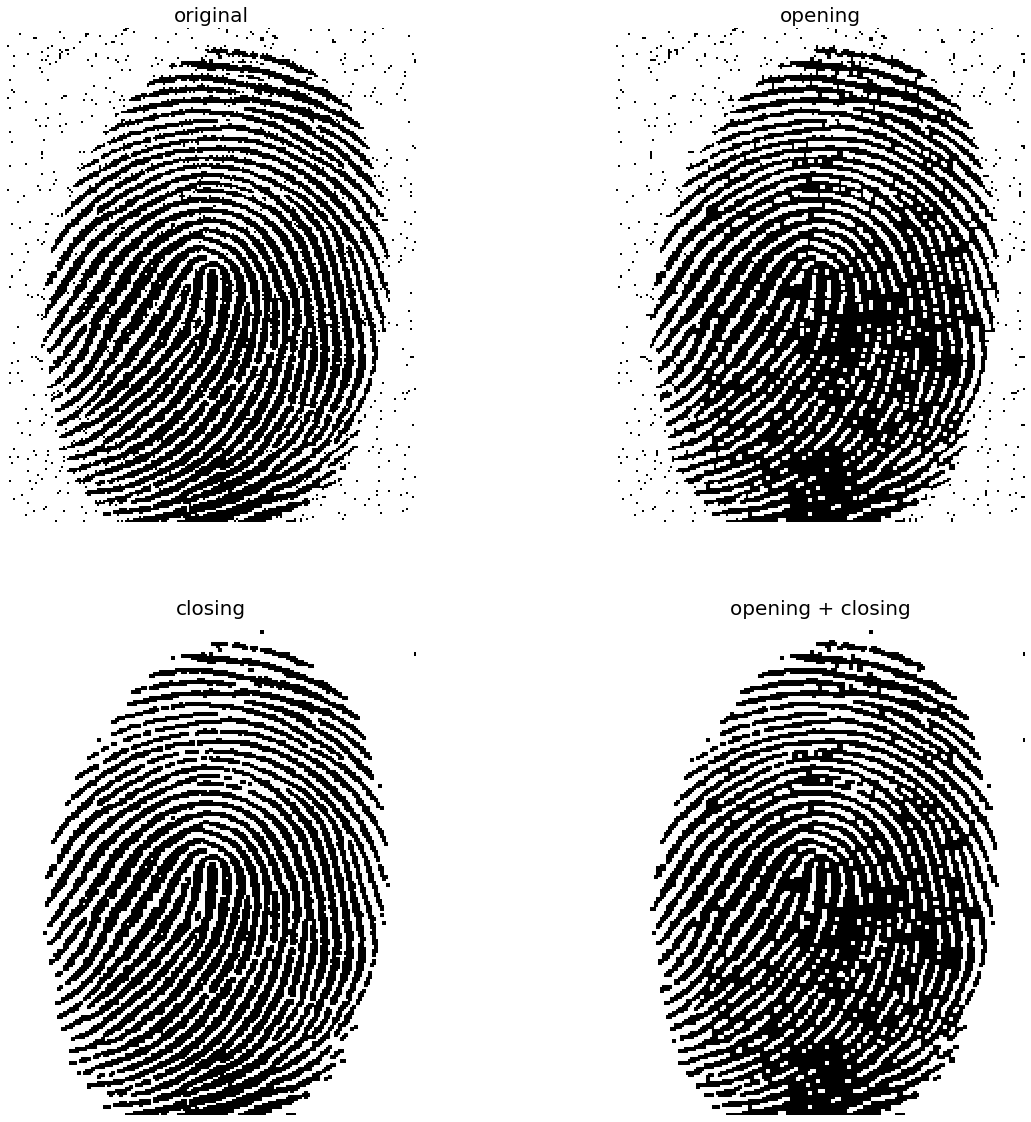

In [19]:
im = rgb2gray(imread('images/fingerprint.jpeg'))
im[im <= 0.5] = 0
im[im > 0.5] = 1
im_o = binary_opening(im, square(2))
im_c = binary_closing(im, square(2))
im_oc = binary_closing(binary_opening(im, square(2)), square(2))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(im)
plt.title('original', size=20)
plt.axis('off')
plt.subplot(222)
plt.imshow(im_o)
plt.title('opening', size=20)
plt.axis('off')
plt.subplot(223)
plt.imshow(im_c)
plt.title('closing', size=20)
plt.axis('off')
plt.subplot(224)
plt.imshow(im_oc)
plt.title('opening + closing', size=20)
plt.axis('off')
plt.show()

## Sınır (boundary) Çıkarımı

1.0


<Figure size 432x288 with 0 Axes>

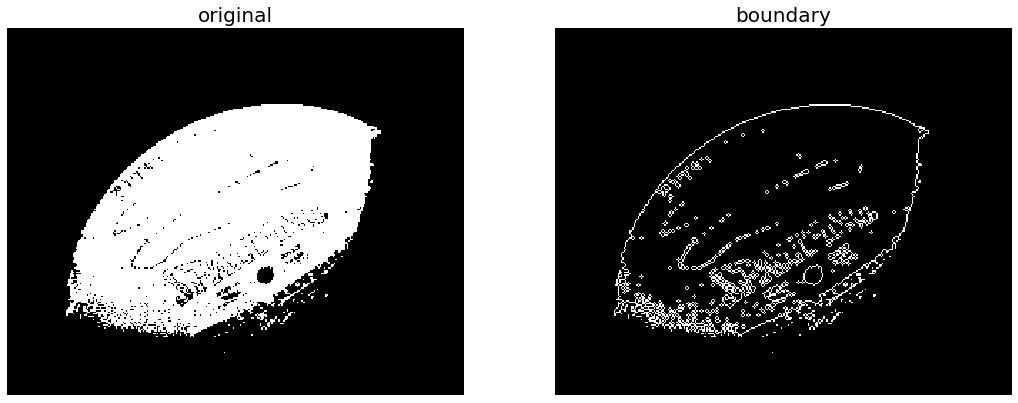

In [20]:
from skimage.morphology import binary_erosion
im = rgb2gray(imread('images/footBall_orig.jpg'))
#im = imread('../new images/dynasaurs.png')[...,3] / 255
print(np.max(im))
#im = 1 - im
th = 0.4
im[im < th] = 0
im[im >= th] = 1
#im1 = opening(im, square(6))
boundary = im - binary_erosion(im)
#im2 = closing(im, square(1))
plot_images_horizontally(im, boundary, 'boundary',sz=(18,9))

True False (316, 440)
True
True
True


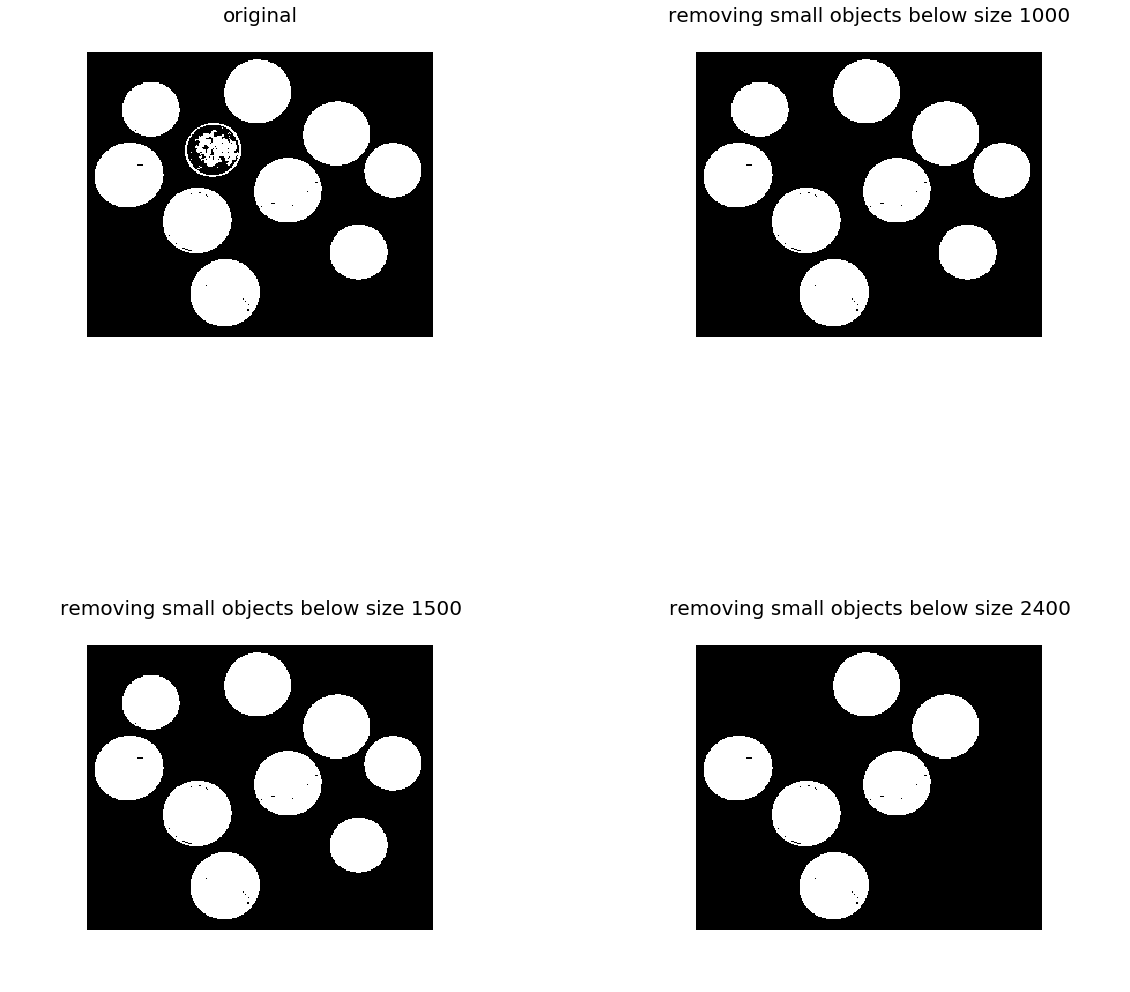

In [21]:
from skimage.morphology import remove_small_objects
im = rgb2gray(imread('images/coins.jpg'))
im[im > 0.5] = 1
im[im <= 0.5] = 0
im = im.astype(np.bool)
print(np.max(im), np.min(im), im.shape)
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(im)
plt.axis('off')
plt.title('original', size=20)
i = 2
for osz in [1000, 1500, 2400]:
    im1 = remove_small_objects(im, osz, connectivity=1) #binary_dilation(im, bridge(2))
    print(np.max(im1))
    plt.subplot(2,2,i)
    plt.imshow(im1)
    plt.axis('off')
    plt.title('removing small objects below size ' + str(osz), size=20)
    i += 1
plt.show()    

Diğer örnekler için: https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html#sphx-glr-auto-examples-applications-plot-morphology-py